In [1]:
#import data melalui google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:

# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [4]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("DAUN")
data = []
labels = []

[INFO] loading images...


In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk('DAUN'):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
import pandas as pd
# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
GMB_01    116
GMB_02    113
GMB_03    112
GMB_04    122
GMB_05    121
dtype: int64

In [7]:
#cek sample datanya
df.head()

,path,file_name,tag
0,DAUN/GMB_03/IMG_20200814_130839_HDR.jpg,IMG_20200814_130839_HDR.jpg,GMB_03
1,DAUN/GMB_03/IMG_20200814_131007_HDR.jpg,IMG_20200814_131007_HDR.jpg,GMB_03
2,DAUN/GMB_03/IMG_20200814_131106_HDR.jpg,IMG_20200814_131106_HDR.jpg,GMB_03
3,DAUN/GMB_03/IMG_20200814_131242_HDR.jpg,IMG_20200814_131242_HDR.jpg,GMB_03
4,DAUN/GMB_03/IMG_20200814_131440_HDR.jpg,IMG_20200814_131440_HDR.jpg,GMB_03


In [8]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [9]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [10]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [11]:
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [12]:

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 224, 224, 3)
(146, 224, 224, 3)


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [14]:

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.15)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [15]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [16]:
vgghist = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32, callbacks=[checkpoint])

Epoch 1/30
14/14 [==============================] - 274s 20s/step - loss: 0.6224 - acc: 0.4361 - val_loss: 0.4158 - val_acc: 0.5411
Epoch 2/30
14/14 [==============================] - 275s 20s/step - loss: 0.3257 - acc: 0.6279 - val_loss: 0.2525 - val_acc: 0.8151
Epoch 3/30
14/14 [==============================] - 274s 20s/step - loss: 0.2765 - acc: 0.7489 - val_loss: 0.2649 - val_acc: 0.7260
Epoch 4/30
14/14 [==============================] - 275s 20s/step - loss: 0.1946 - acc: 0.8379 - val_loss: 0.3251 - val_acc: 0.6370
Epoch 5/30
14/14 [==============================] - 274s 20s/step - loss: 0.1678 - acc: 0.8653 - val_loss: 0.1760 - val_acc: 0.8836
Epoch 6/30
14/14 [==============================] - 274s 20s/step - loss: 0.1485 - acc: 0.8904 - val_loss: 0.2105 - val_acc: 0.8219
Epoch 7/30
14/14 [==============================] - 276s 20s/step - loss: 0.1086 - acc: 0.9155 - val_loss: 0.2159 - val_acc: 0.7945
Epoch 8/30
14/14 [==============================] - 273s 20s/step - loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


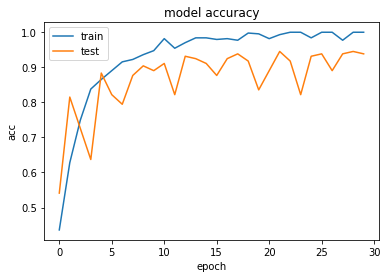

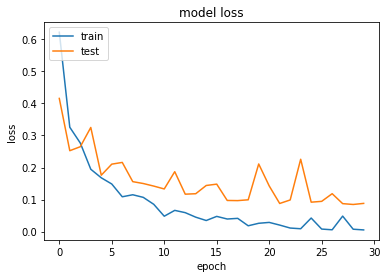

In [17]:
import matplotlib.pyplot as plt

print(vgghist.history.keys())
# summarize history for accuracy
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.97      0.87      0.92        39
      GMB_02       0.91      0.91      0.91        23
      GMB_03       0.97      0.97      0.97        30
      GMB_04       0.88      1.00      0.93        28
      GMB_05       0.96      0.96      0.96        26

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146

